我們認真的來做一下數據分析! 基本上我們從迴歸、機器學習, 到深度學習, 都是要學一個函數。過程從現在到未來都是:

![函數學習](images/function_learning.png)

函數學習 訓練 預測 

In [21]:
%matplotlib inline 

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 06-01 線性迴歸

#### 做一條直線

我們來一條線, 比如說

$$f(x) = 1.2x + 0.8$$

準備好個 50 個點

In [22]:
x = np.linspace(0,5,50)
y = 1.2*x+0.8

畫出圖形來。

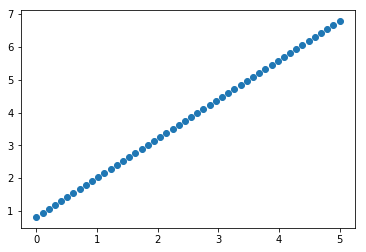

In [23]:
plt.scatter(x,y)

#### 加入 noise 項, 看來更真實

大概的想法就是, 我們真實世界的問題, 化成函數, 我們假設背後有個美好的函數。但相信我們很少看到真實世界的資料那麼漂亮。在統計上, 我們就是假設

$$f(x) + \varepsilon(x)$$

也就是都有個 noise 項。

In [24]:
y =1.2*x +0.8 +0.5*np.random.randn(50)

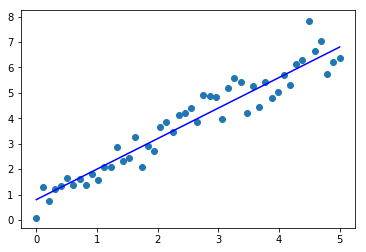

In [25]:
plt.scatter(x,y)
plt.plot(x,1.2*x +0.8 , 'b')

#### 做線性迴歸找出那條線

做線性迴歸有很多套件, 但我們這裡用 `sklearn` 裡的 `LinearRegression` 來做, 嗯, 線性迴歸。

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
regr = LinearRegression()

這裡要注意我們本來的 x 是

$$[x_1, x_2, \ldots, x_{50}]$$

但現在要的是

$$[[x_1], [x_2], \ldots, [x_{50}]]$$

這樣的。

In [33]:
X=x.reshape(len(x),1)

In [34]:
regr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [35]:
Y=regr.predict(X)

In [36]:
regr.predict([[1.3]])

array([2.35732969])

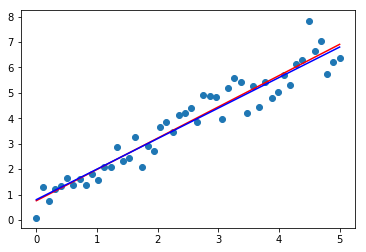

In [39]:
plt.scatter(x,y)
plt.plot(x , Y , 'r')
plt.plot(x,1.2*x +0.8 , 'b')

## 06-02 標準函數訓練及測試

#### 分訓練資料、測試資料

一般我們想要看算出來的逼近函數在預測上是不是可靠, 會把一些資料留給「測試」, 就是不讓電腦在計算時「看到」這些測試資料。等函數學成了以後, 再來測試準不準確。這是我們可以用

    sklearn.cross_validation
    
裡的

    train_test_split
    
來亂數選一定百分比的資料來用。

In [40]:
x = np.linspace(0 , 5, 200)
y=1.2*x +0.8 + 0.5*np.random.randn(200)

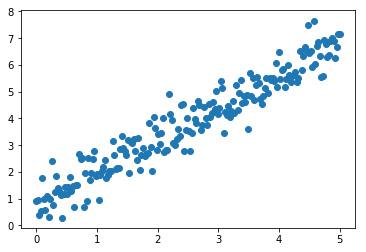

In [41]:
plt.scatter(x,y)

把原來的 `x`, `y` 中的 70% 給 training data, 30% 給 testing data。

In [42]:
from sklearn.model_selection import train_test_split

我們在「訓練」這個函數時只有以下這些資料。

In [43]:
X=x.reshape(len(x),1)

In [44]:
x_train, x_test, x_train, y_test= train_test_split(X,y,test_size=0.3, random_state = 204)

#### 用訓練資料來 fit 函數

記得現在我們只用 70% 的資料去訓練。

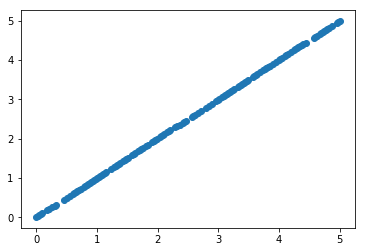

In [45]:
plt.scatter (x_train,x_train)

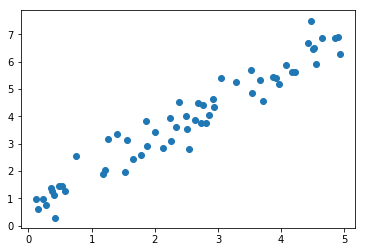

In [46]:
plt.scatter (x_test , y_test)

In [ ]:
regr = LinearRegression() 

In [49]:
regr.fit(x_train , y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [50]:
Y_pred = regr.predict(x_test)

#### 用測試資料試試我們預測準不準

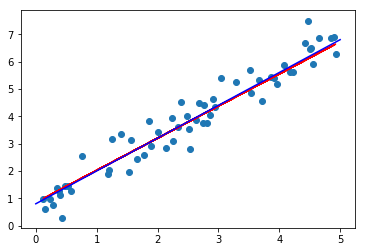

In [53]:
plt.scatter(x_test,y_test)
plt.plot(x_test,Y_pred,'r')
plt.plot(x, x*1.2+0.8,'b')

## 06-03 不是線性的目標函數

這裡我們用個非線性的函數來生假數據:

$$f(x) = \sin(3.2x) + 0.8x$$

一樣準備加上一些 noise。

### 生成假資料

#### 標準線性學

果然超級不準, 該如何是好?

#### 多項式

我們來用 6 次多項式學

#### 用 RBF!!

$$\phi_i = e^{-\| x - c_i \|^2/2\sigma^2}$$

#### 三種一起比較